In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

## Load and Preliminary Exploration of the Dataset

In [2]:
# Load the Boston House Price Dataset
from sklearn.datasets import load_boston

boston = load_boston()

c:\Users\lnam9\OneDrive\Desktop\Projects\Boston Housing Price\Boston-House-Pricing\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

  

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
# Description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Prepare the Dataset

In [5]:
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
data['price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data.info() # Check datatypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
data.describe() # Summary statistics

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
data.isnull().sum() # Check for missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

### Exploratory Data Analysis

In [10]:
# Check correlation matrix
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


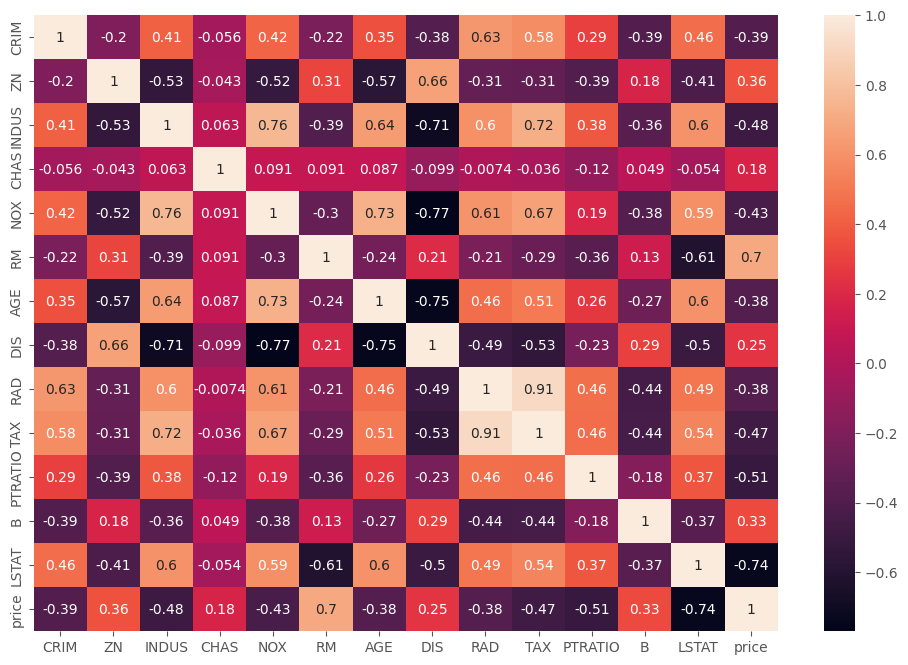

In [11]:
# Visualize the correlation matrix as a heatmap
sns.heatmap(data.corr(), annot=True);

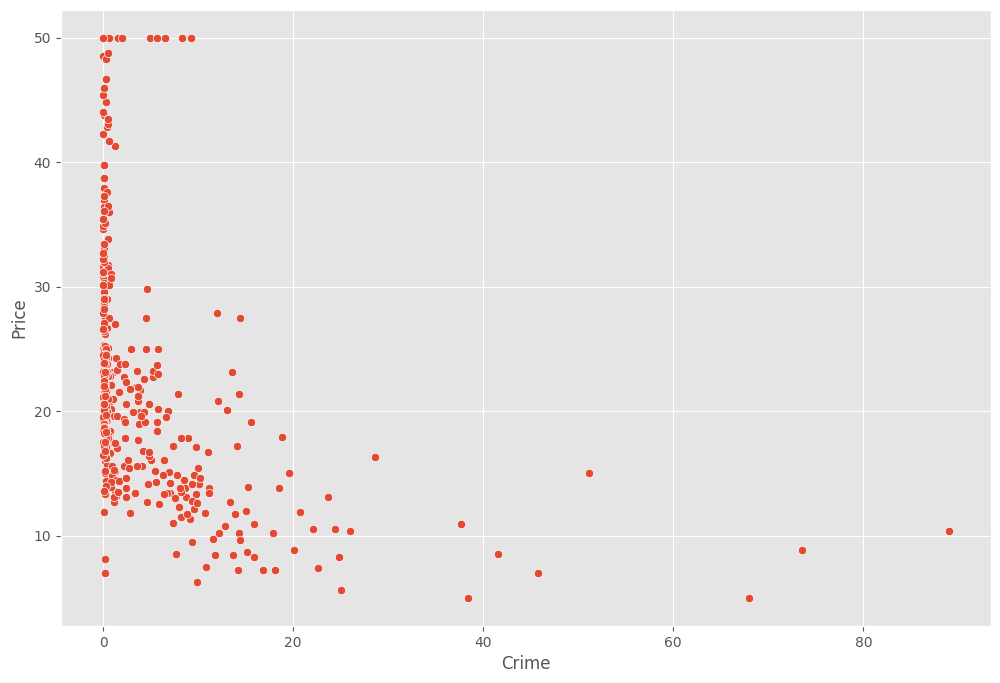

In [12]:
sns.scatterplot(x='CRIM', y='price', data=data)
plt.xlabel('Crime')
plt.ylabel('Price');

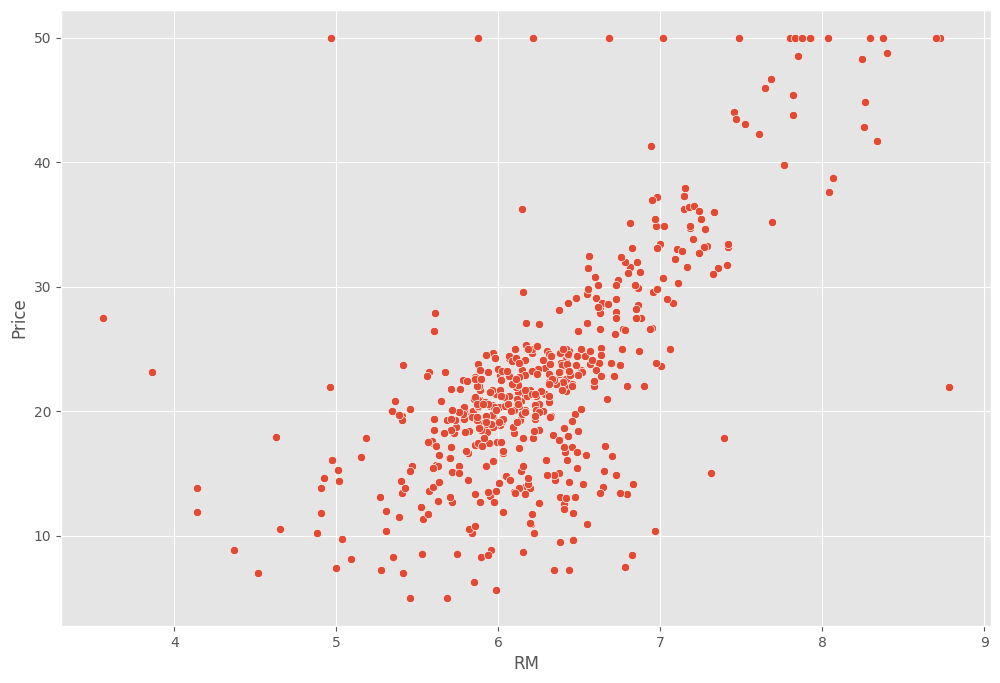

In [13]:
sns.scatterplot(x='RM', y='price', data=data)
plt.xlabel('RM')
plt.ylabel('Price');

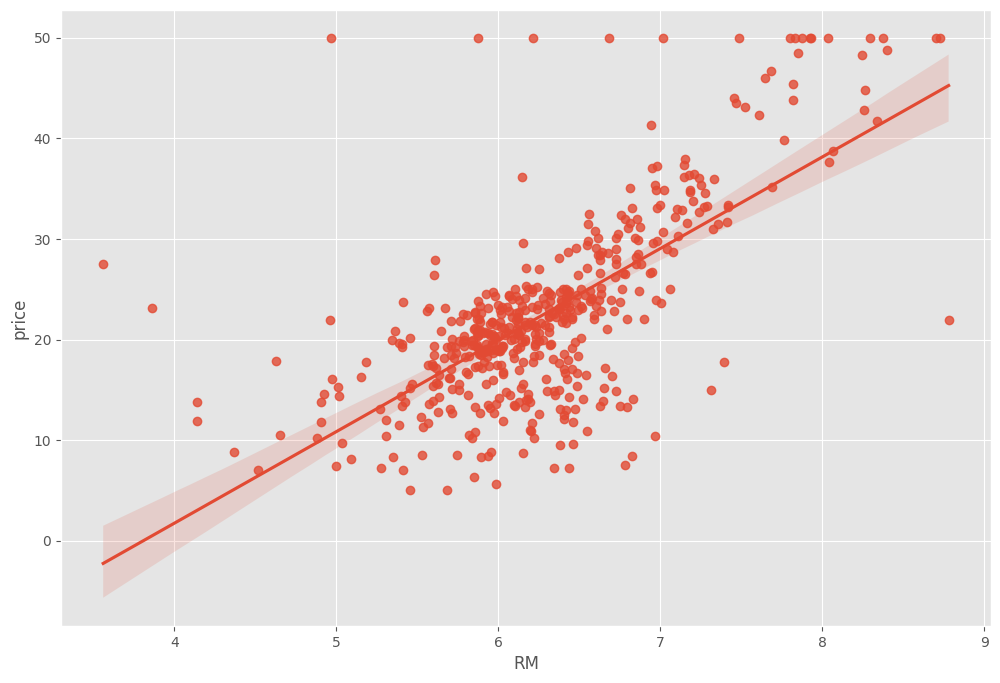

In [14]:
sns.regplot(x='RM', y='price', data=data);

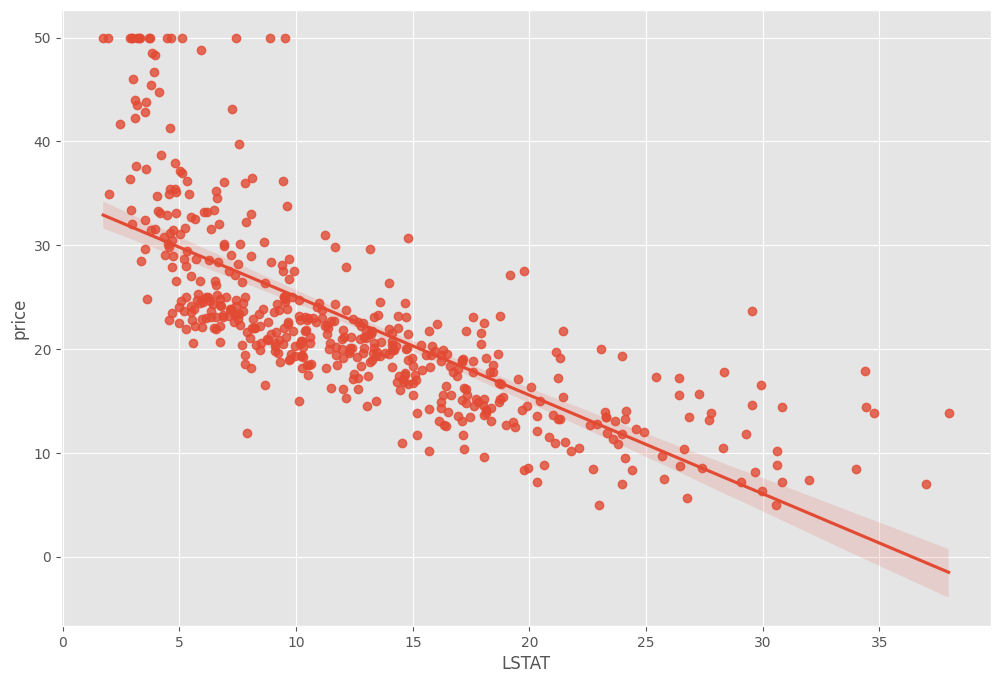

In [15]:
sns.regplot(x='LSTAT', y='price', data=data);

In [16]:
# Creating train set and test set
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [17]:
# Standardize the train set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [18]:
import pickle
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [18]:
X_test = scaler.transform(X_test) # don't fit, since we want to avoid data leakage

## Model Building

In [19]:
from sklearn.linear_model import LinearRegression


In [20]:
regression = LinearRegression()

In [21]:
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# print coefficients of linear regression
regression.coef_

array([-0.89927996,  1.02161297,  0.28531285,  0.68404814, -2.19298487,
        2.87585943,  0.42600322, -2.82621531,  3.19737612, -2.58645936,
       -1.94883382,  0.99322286, -3.56964178])

In [23]:
# print intercept
regression.intercept_

22.652824858757068

In [24]:
# print parameters on which the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [25]:
# prediction on test data 
reg_pred = regression.predict(X_test)
reg_pred

array([23.84511817,  2.88426841, 27.76633861, 26.04249007,  6.76316313,
       15.35541663, 23.56500079,  4.90218715, 40.73094074, 30.08405102,
       10.49820545, 17.53870021, 25.79296314, 23.41327065, 19.18044314,
        7.46239972, 35.91178934, 30.93404371, 22.32918975, 13.50668882,
       26.55733115, 34.02181675, 43.6563234 , 33.44813081, 13.07511303,
       12.50832552, 15.92047244, 19.18436321, 31.68869889, 25.04033235,
       12.53125467, 11.73831064, 20.05702853, 16.48196613, 24.69407984,
       23.13757738, 26.49138905, 19.73388257, 20.61196586, 35.04976003,
       23.52204105, 31.01418097, 26.95232052, 13.20403704, 27.51568394,
       20.47648818, 21.5362907 , 26.40141089, 20.01322823, 18.62521146,
       23.67383693, 38.26213637, 26.19999601, 29.54287364, 38.76919964,
       31.38330385, 33.21749275, 17.29934134, 19.97054504, 17.58043181,
       24.43965061, 22.1907987 , 11.81570295, 19.87708088, 22.20317672,
        7.58585511, 13.86474148, 14.54904038, 30.15872227, 40.98

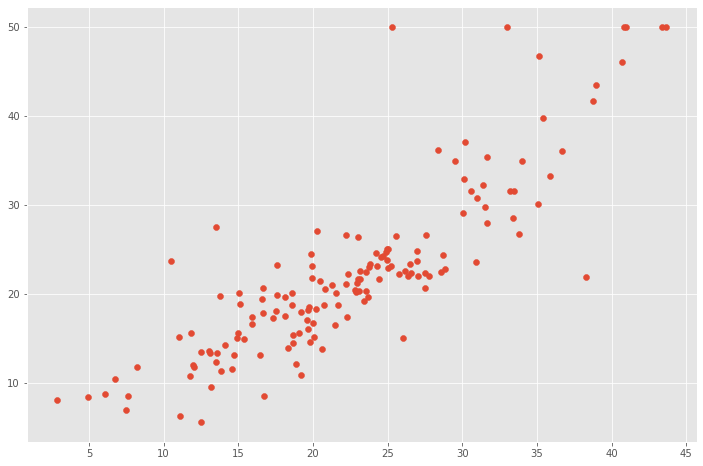

In [26]:
# scatterplot for predictions
plt.scatter(reg_pred, y_test);

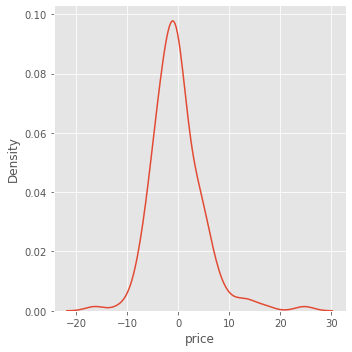

In [27]:
# plot residuals
residuals = y_test - reg_pred
sns.displot(residuals, kind='kde');

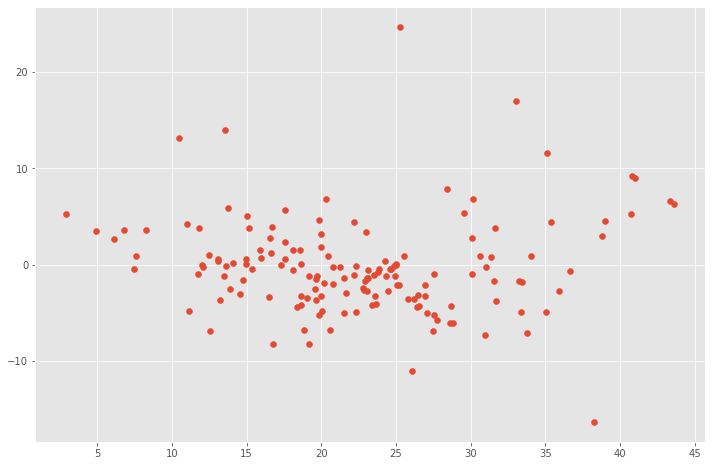

In [28]:
# scatter plot of predictions and residuals

plt.scatter(reg_pred, residuals)

In [29]:
# Performance metric

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [30]:
print("MAE:",mean_absolute_error(y_test, reg_pred))
print("MSE:", mean_squared_error(y_test, reg_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, reg_pred)))

MAE: 3.5366859628884764
MSE: 25.01413070165433
RMSE: 5.001412870545115


In [31]:
# R squared
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.7263263285991054


In [32]:
# adjusted R squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7005454754961226

## Pickling the Model File for Deployment

In [33]:
import pickle

In [34]:
pickle.dump(regression, open('regmodel.pkl', 'wb'))

In [35]:
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))